<a id='home'></a>
# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul>
        <li><a href="#dataset intro">Dataset Intro</a></li>
        <li><a href="#questions">Questions</a></li>
    </ul></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#observations">Observations</a></li>
        <li><a href="#cleaning">Data Cleaning</a></li>
    </ul></li>
    <li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#1">Which genres are most popular from year to year?</a></li>
        <li><a href="#2"> What kinds of properties are associated with movies that have high revenues?</a></li>
        <li><a href="#3"> What kinds of properties are associated with movies that have high revenues? (Accounting for Inflation)</a></li>
        <li><a href="#4">What is the film with the highest budget each year?</a></li>
    </ul></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


<a id='dataset intro'></a>
### Dataset Intro
I chose to work with the TMDB dataset.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> __General Info about this dataset__:
> - It has a total of 10866 rows and 21 columns
> - Certain columns, ('cast', 'director', 'keywords', 'genres', 'production_companies'), contain multiple values separated by pipe (|) characters.
> - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. We can leave them as is. (There are some characters like those in the 'director' column as well.
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

<a id='questions'></a>
### Interesting Questions
1. Which genres are most popular from year to year?


2. What kinds of properties are associated with movies that have high revenues?


3. Does higher average vote (rating) corellate with higher revenues? (we can check for this using raw revenues or revenues_adj to account for inflation)


4. What is the film with the highest budget each year?




### Notice
I use the explode() function in this notebook, so the following code cell makes sure that the  needed pandas version is installed.

> After this code cell runs, please restart the kernel

In [1]:
# I use this command to update pandas because i use the explode() function which is new in pandas 0.25.0
!pip3 install --user --upgrade pandas

Requirement already up-to-date: pandas in /root/.local/lib/python3.6/site-packages (1.1.5)


In [2]:
# Let's get done with the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [3]:
# Function Definition
def plot(df=None, x=None, y=None, type='bar', figsize=(15,8), title="", xlabel="", ylabel="", width=1.5, xticks=None, 
         colormap=None, rot=None, table=None):
    """
    plot function: takes a dataframe with specifications like type, title, axes labels 
    and plots the dataframe following the provided specs
    """
    if type != 'line' and type != 'pie':
        return df.plot(x=x, y=y, kind=type, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, 
                width=width, xticks=xticks, rot=rot, colormap=colormap)
    elif type=='pie':
        plt.axis('square');
        return df.plot(x=x, y=y, kind=type, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, 
                xticks=xticks, rot=rot, colormap=colormap, table=table)
    else:
        return df.plot(x=x, y=y, kind=type, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, 
                xticks=xticks, rot=rot, colormap=colormap)

<a id='wrangling'></a>
## Data Wrangling


> In this section of the report, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [4]:
# Use wget to download the csv file from the server. "-nc" command prevents wget from downloading the file if it already exists
!wget -nc https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv

File ‘tmdb-movies.csv’ already there; not retrieving.



In [5]:
# Load your data and print out a few lines. Perform operations to inspect data 
# types and look for instances of missing or possibly errant data.

df = pd.read_csv("tmdb-movies.csv")
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape

(10866, 21)

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1f241ef0>,
      dtype=object)

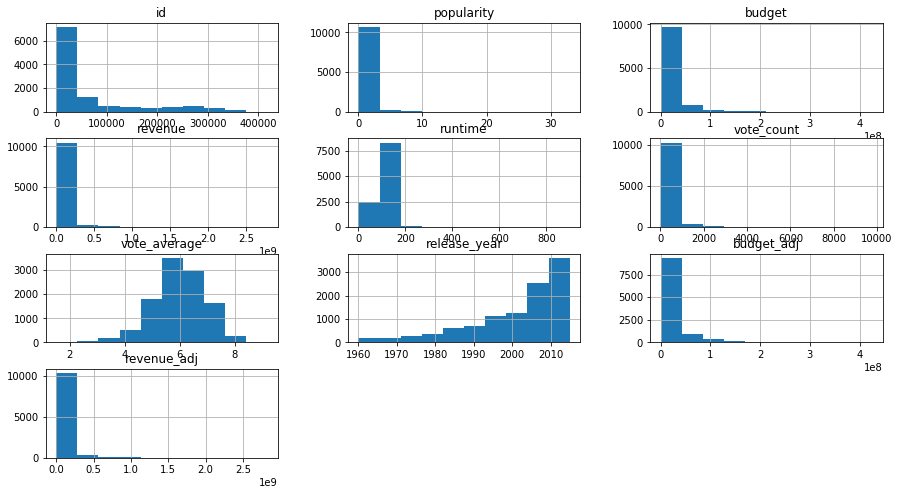

In [9]:
df.hist(figsize=(15,8))

In [10]:
#let's check the movies with 0 runtime
df[df['runtime']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,NaN,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,NaN,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,NaN,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,dance|dance-off,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [11]:
df[(df['budget'] == 0) | (df['revenue'] == 0) | (df['budget_adj'] == 0) | (df['revenue_adj'] == 0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


It doesn't look like this missing overview will affect our analysis, so we can leave it as it is.

we also need to check if there are any duplicates in the data

In [12]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
df.query("tagline == 'Survival is no game'")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<a id='observations'></a>
### We Notice
- There are some missing imdb_id values (most probably we will not need this column for our analysis anyway)


- Some movies are missing values in the 'cast', 'homepage', 'director', 'tagline', 'keywords', overview', 'genres', 'production_companies' columns (we may not need all of those columns, but the 'director' and 'genres' columns might be useful in analysis)


- There are some rows in 'budget', 'revenue', 'budget_adj', 'revenue_adj' that have 0 values


- There are movies where 'runtime' is 0


- `release_year` is in int format, we can change it to date format


- The films that have `runtime` of 0 mostly have budget and revenues also as 0 except in some cases. However, they still have 'vote_average' (We can move the movies with runtime = 0 as it may affect our analysis)


- Movies with budget or revenue = 0 can be kept as is for now


- The `genres` column has multiple values in each row


- The number of movies released each year is increasing exponentially


- The rating of movies follows a normal distribution, but it skewed to the right a little


- The movie 'TEKKEN' is duplicated

#### Now, the dataset looks clean enough that we  can get answers for the  questions we asked

<a id='cleaning'></a>
### Data Cleaning

> 1. Remove the columns we won't need for analysis to save memory.
> 2. Drop rows that don't have values for `genres`.
> 3. Use a generic string for movies that don't have tagline instead of nan.
> 4. Remove duplicates
> 5. Explode `genres` column to ease working with it. (use `str.split()` and `explode()` functions) 

>```explode() is new in pandas 0.25.0```

In [14]:
# let's  remove the columns we don't need ['imdp_id', 'cast', 'homepage', 'release_date', 'vote_count']
df.drop(['imdb_id', 'cast', 'homepage', 'release_date', 'vote_count'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   tagline               8042 non-null   object 
 7   keywords              9373 non-null   object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [15]:
# now let's drop movies that don't have values for ['director', 'keywords', 'genres']
df.dropna(subset=['genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   popularity            10843 non-null  float64
 2   budget                10843 non-null  int64  
 3   revenue               10843 non-null  int64  
 4   original_title        10843 non-null  object 
 5   director              10801 non-null  object 
 6   tagline               8037 non-null   object 
 7   keywords              9368 non-null   object 
 8   overview              10840 non-null  object 
 9   runtime               10843 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9827 non-null   object 
 12  vote_average          10843 non-null  float64
 13  release_year          10843 non-null  int64  
 14  budget_adj            10843 non-null  float64
 15  revenue_adj        

In [16]:
# tagline has Nan values, it shouldn't affect us but let's replace it with a common string so that we know whhen we get it that this film didn't have a tagline
df['tagline'].fillna("no tagline", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   popularity            10843 non-null  float64
 2   budget                10843 non-null  int64  
 3   revenue               10843 non-null  int64  
 4   original_title        10843 non-null  object 
 5   director              10801 non-null  object 
 6   tagline               10843 non-null  object 
 7   keywords              9368 non-null   object 
 8   overview              10840 non-null  object 
 9   runtime               10843 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9827 non-null   object 
 12  vote_average          10843 non-null  float64
 13  release_year          10843 non-null  int64  
 14  budget_adj            10843 non-null  float64
 15  revenue_adj        

In [17]:
#let's see the movie with Nan in overview
df[df['overview'].isna()]

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
548,355131,0.108072,0,0,Sense8: Creating the World,NaN,no tagline,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,7.5,2015,0.0,0.0
3722,85993,0.279647,0,0,Baciato dalla fortuna,Paolo Costella,no tagline,NaN,NaN,100,Comedy,NaN,4.7,2011,0.0,0.0
3794,58253,0.183134,0,0,"Toi, moi, les autres",Audrey Estrougo,no tagline,woman director,NaN,0,Music|Romance,NaN,5.2,2011,0.0,0.0


In [18]:
#Let's remove the duplicates
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [19]:
# let's change the values in genres from strings to list to ease cleaning and working with them in general
df.genres = df.genres.str.split('|')

In [20]:
df.genres.head(5)

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


<a id='1'></a>
### 1. Which genres are most popular from year to year?

In [21]:
# Let's make another dataframe for genres to find out the 2 most popular genres for each year
genres_df = df[['popularity', 'genres', 'release_year']]
genres_df.head()

,popularity,genres,release_year
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",2015
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",2015
2,13.112507,"[Adventure, Science Fiction, Thriller]",2015
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",2015
4,9.335014,"[Action, Crime, Thriller]",2015


In [22]:
# make each row contain only one genre and repeat rows that has multiple genres
genres_df = genres_df.explode('genres')

In [23]:
genres_df.groupby(['release_year', 'genres']).popularity.sum()

release_year  genres         
1960          Action               4.725796
              Adventure            3.504904
              Comedy               3.168003
              Crime                0.692959
              Drama                7.361967
                                    ...    
2015          Science Fiction    193.121886
              TV Movie             5.211474
              Thriller           239.720907
              War                 11.560600
              Western             19.072777
Name: popularity, Length: 1049, dtype: float64

In [24]:
# Find the popularity of each genre throughout the years and choose the 2 most popular genres for each year
genres_df_copy = genres_df.groupby(['release_year', 'genres'])[['popularity']].sum()
genres_df_copy = genres_df_copy['popularity'].groupby('release_year', group_keys=False).nlargest(1)
genres_df_copy

release_year  genres   
1960          Drama          7.361967
1961          Drama          6.915731
1962          Drama          8.232008
1963          Thriller       7.199292
1964          Comedy         7.859657
1965          Drama          6.105756
1966          Drama          5.436264
1967          Drama          8.183477
1968          Drama          7.546450
1969          Drama          6.368528
1970          Drama          6.015169
1971          Drama         12.093149
1972          Drama         11.127861
1973          Drama         14.752277
1974          Drama         11.044738
1975          Drama          9.498630
1976          Drama         12.950282
1977          Adventure     21.107186
1978          Drama         10.224622
1979          Drama         14.241453
1980          Action        16.057688
1981          Adventure     12.261412
1982          Drama         17.947000
1983          Action        17.877840
1984          Action        25.232337
1985          Comedy      

#### - Let's first see the distribution of popularity and relsease per year for genres

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1dc56ac8>,
      dtype=object)

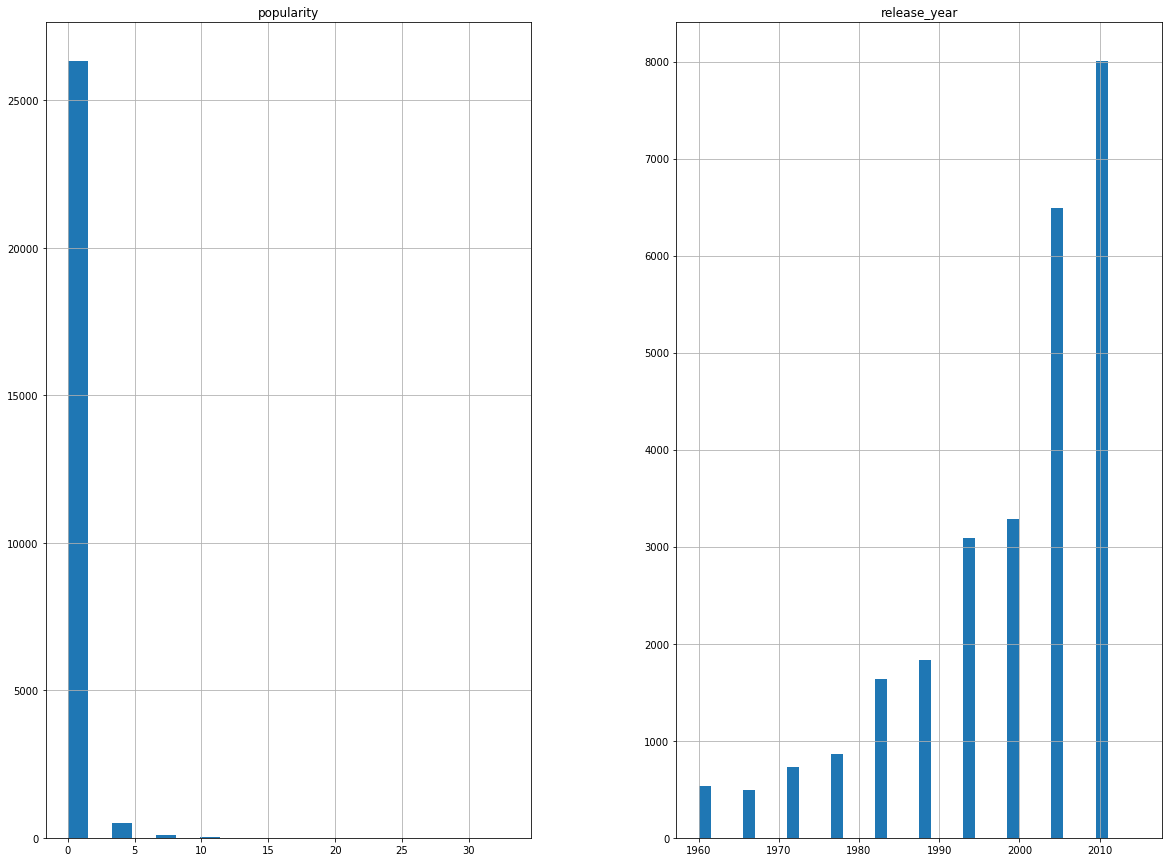

In [25]:
genres_df.hist(figsize=(20,15), width=1.5);

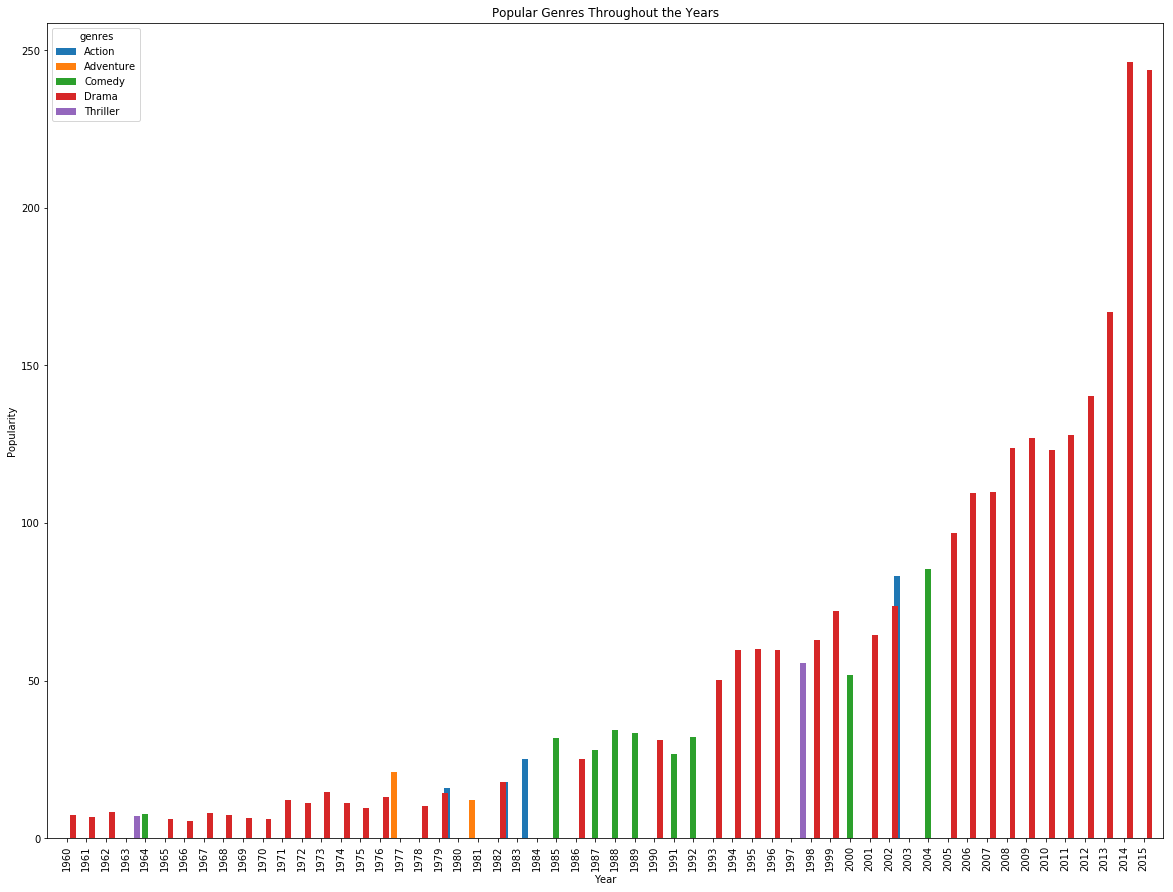

In [26]:
plot(df=genres_df_copy.unstack(), type='bar', figsize=(20,15), title="Popular Genres Throughout the Years", xlabel="Year", 
                                  ylabel="Popularity", width=1.5);

>#### We notice that the _Drama_ genre for example has been popular throughout the years
We may also notice that there has been steady increase in the number of movies produced throughout the years, but let's confirm this insight next

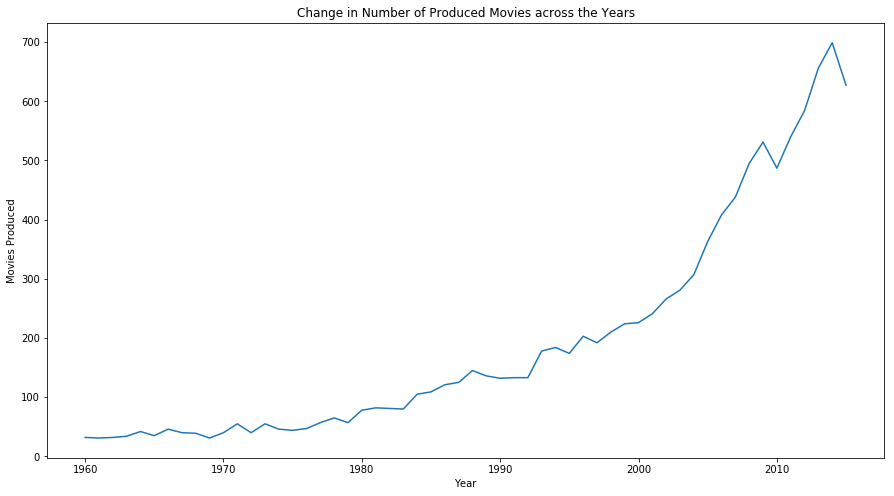

In [27]:
plot(df=df.groupby('release_year').count()['original_title'], type='line', xlabel='Year', ylabel='Movies Produced', 
     title='Change in Number of Produced Movies across the Years', xticks = np.arange(1960,2016,10));

>#### This confirms that there has been a steady increase in number of movies produced per year, although it looks like there has been a decrease during the last few years

<a id='2'></a>
### 2. What kinds of properties are associated with movies that have high revenues? 
>(Calculated for the `revenues` column)

<ul>
    <li><a href="#2.1">Is there a relation between average vote and high revenues?</a></li>
    <li><a href="#2.2">Is there a relation between Popularity and High Revenues?</a></li>
    <li><a href="#2.3">What are the genres associated with high revenue movies?</a></li>
</ul>

In [28]:
# What are the 20 movies with highest revenues
revenues_df = df.sort_values(by=['revenue'], ascending=False)[:20]
revenues_df.head(20)

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141,"[Action, Adventure, Science Fiction]",Marvel Studios|Prime Focus|Revolution Sun Studios,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130,"[Adventure, Family, Fantasy]",Warner Bros.|Heyday Films|Moving Picture Compa...,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102,"[Animation, Adventure, Family]",Walt Disney Pictures|Walt Disney Animation Stu...,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130,"[Action, Adventure, Science Fiction]",Marvel Studios,6.9,2013,1.872067e+08,1.137692e+09


In [29]:
revenues_df.reset_index(inplace=True, drop=True)
revenues_df

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,19995,9.432768,237000000,2781505847,Avatar,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09
1,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
2,597,4.355219,200000000,1845034188,Titanic,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09
3,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
5,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
6,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141,"[Action, Adventure, Science Fiction]",Marvel Studios|Prime Focus|Revolution Sun Studios,7.4,2015,2.575999e+08,1.292632e+09
7,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130,"[Adventure, Family, Fantasy]",Warner Bros.|Heyday Films|Moving Picture Compa...,7.7,2011,1.211748e+08,1.287184e+09
8,109445,6.112766,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102,"[Animation, Adventure, Family]",Walt Disney Pictures|Walt Disney Animation Stu...,7.5,2013,1.404050e+08,1.192711e+09
9,68721,4.946136,200000000,1215439994,Iron Man 3,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130,"[Action, Adventure, Science Fiction]",Marvel Studios,6.9,2013,1.872067e+08,1.137692e+09


[Text(0,0,'Avatar'),
 Text(0,0,'Star Wars: The Force Awakens'),
 Text(0,0,'Titanic'),
 Text(0,0,'The Avengers'),
 Text(0,0,'Jurassic World'),
 Text(0,0,'Furious 7'),
 Text(0,0,'Avengers: Age of Ultron'),
 Text(0,0,'Harry Potter and the Deathly Hallows: Part 2'),
 Text(0,0,'Frozen'),
 Text(0,0,'Iron Man 3'),
 Text(0,0,'Minions'),
 Text(0,0,'Transformers: Dark of the Moon'),
 Text(0,0,'The Lord of the Rings: The Return of the King'),
 Text(0,0,'Skyfall'),
 Text(0,0,'The Net'),
 Text(0,0,'The Dark Knight Rises'),
 Text(0,0,"Pirates of the Caribbean: Dead Man's Chest"),
 Text(0,0,'Toy Story 3'),
 Text(0,0,'Alice in Wonderland'),
 Text(0,0,'Pirates of the Caribbean: On Stranger Tides')]

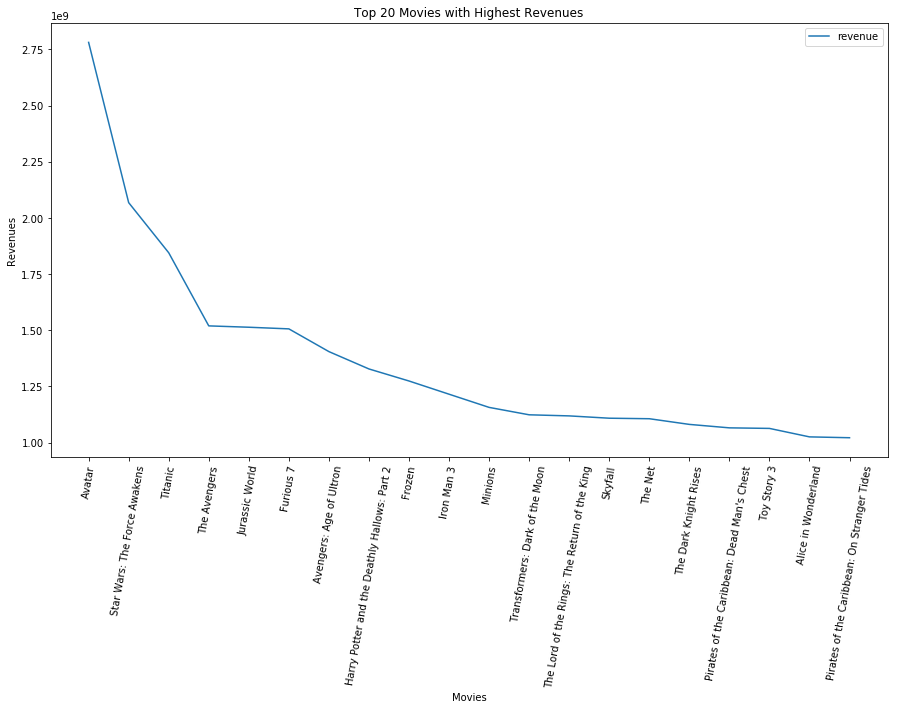

In [32]:
ax = plot(df=revenues_df, y='revenue', ylabel= "Revenues", type='line', xlabel="Movies", 
          title="Top 20 Movies with Highest Revenues", rot=80, 
     xticks=revenues_df.index)
ax.set_xticklabels(revenues_df.original_title);

<a id='2.1'></a>
#### 2.1 Is there a relation between average vote and high revenues?

##### - Let's first see the distributions of different columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1d75fb70>,
      dtype=object)

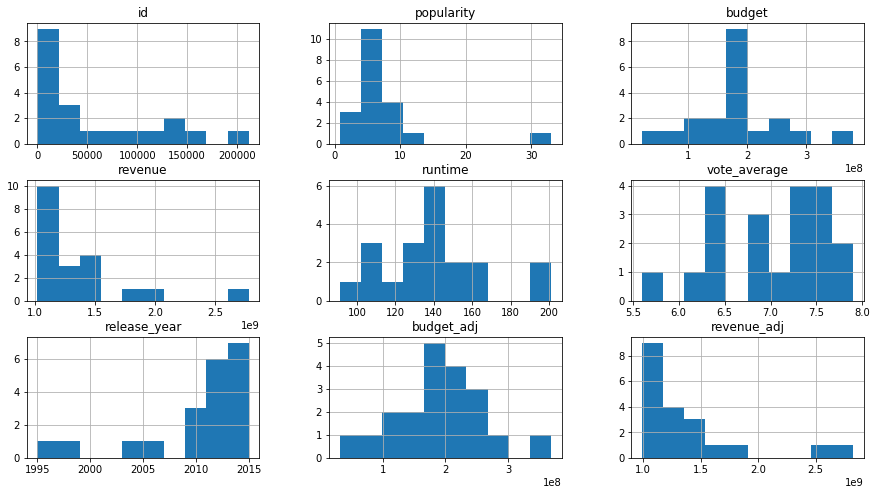

In [33]:
revenues_df.hist(figsize=(15,8));

>#### - Notice that popularity and revenues columns are skewed to the left, meaning that most of the high revenue movies have popularity between 0 - 10, and that most of them have revenues that fall between 1 and 1.5 billion US Dollars
>#### - As for average votes, it's a bit skewed to the right and it starts after 5.5; Meaning that all of the high revenue movies have average ratings that are more than 5.5 with most of them falling in the range from 6.5 and 8.0

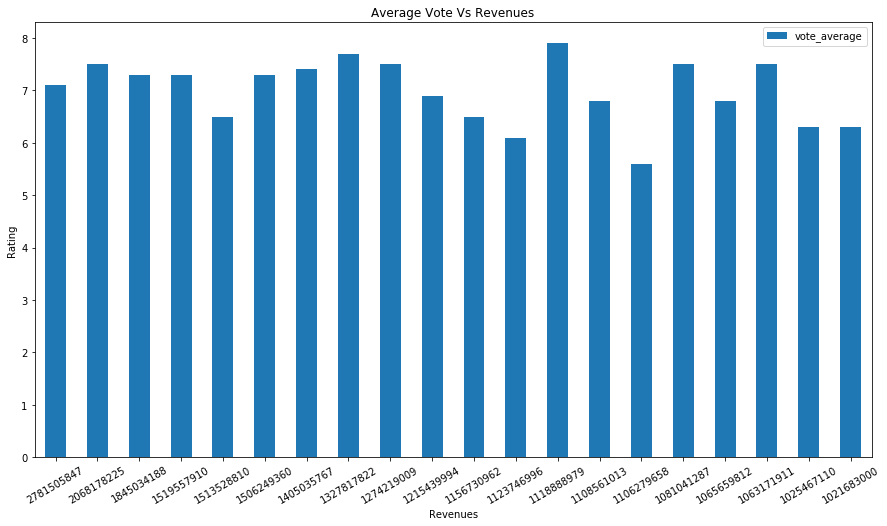

In [34]:
plot(df=revenues_df, x='revenue', y='vote_average', xlabel= "Revenues", ylabel="Rating", 
                 title="Average Vote Vs Revenues", rot = 30, type='bar', width=0.5);

>#### We see that higher revenues are not in direct correlation with a vote average, but all 20 movies with high revenues are accociated with a rating > 5

##### Let's see what is the movie with the highest vote average among those high profit movies

In [35]:
revenues_df.loc[revenues_df['revenue'] == revenues_df.iloc[revenues_df['vote_average'].argmax()].revenue]

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
12,122,7.122455,94000000,1118888979,The Lord of the Rings: The Return of the King,Peter Jackson,The eye of the enemy is moving.,elves|orcs|middle-earth (tolkien)|based on nov...,Aragorn is revealed as the heir to the ancient...,201,"[Adventure, Fantasy, Action]",WingNut Films|New Line Cinema,7.9,2003,1.114231e+08,1.326278e+09


##### And what was the rank of this movie among the high revenues movies?

In [36]:
revenues_df['vote_average'].argmax()+1

13

<a id='2.2'></a>
#### 2.2 Is there a relation between Popularity and High Revenues?

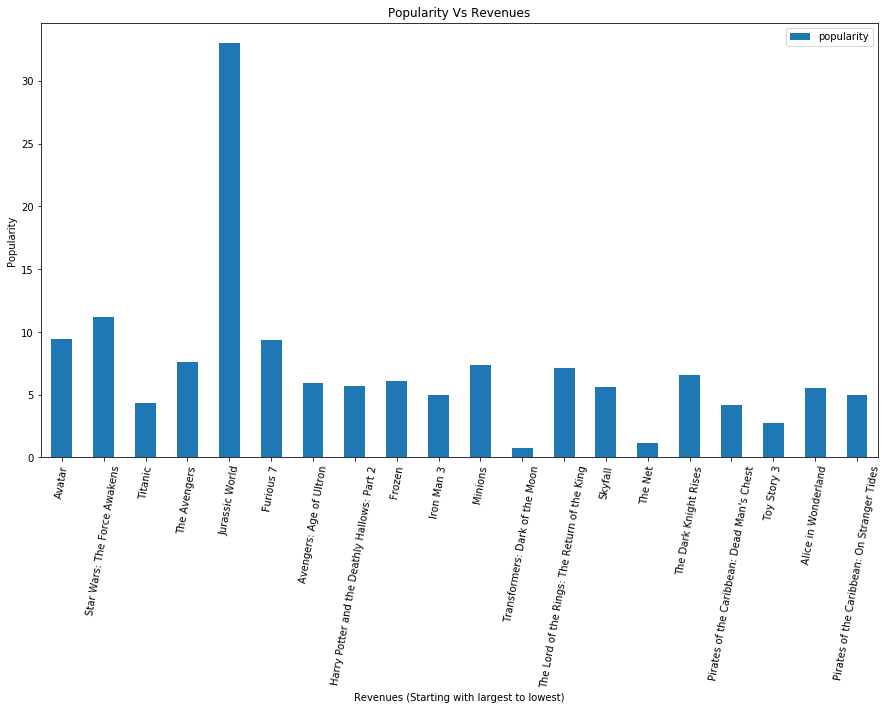

In [37]:
plot(df=revenues_df, x='original_title', y='popularity', xlabel= "Revenues (Starting with largest to lowest)", ylabel="Popularity", 
                 title="Popularity Vs Revenues", rot = 80, type='bar', figsize=(15,8), width=0.5);

>#### We notice there is not a general trend with popularity as well, even if we disregarded Jurassic World popularity as an outlier

<a id='2.3'></a>
#### 2.3 What are the genres associated with high revenue movies?

In [38]:
# What are the unique genres that we have
set(itertools.chain.from_iterable(df.genres))

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [39]:
# Let's find out the count of each genre
revenue_genres = pd.Series(revenues_df['genres'].explode()).value_counts()
revenue_genres

Adventure          15
Action             14
Science Fiction     7
Fantasy             7
Thriller            6
Family              5
Crime               3
Animation           3
Drama               3
Comedy              2
Mystery             1
Romance             1
Name: genres, dtype: int64

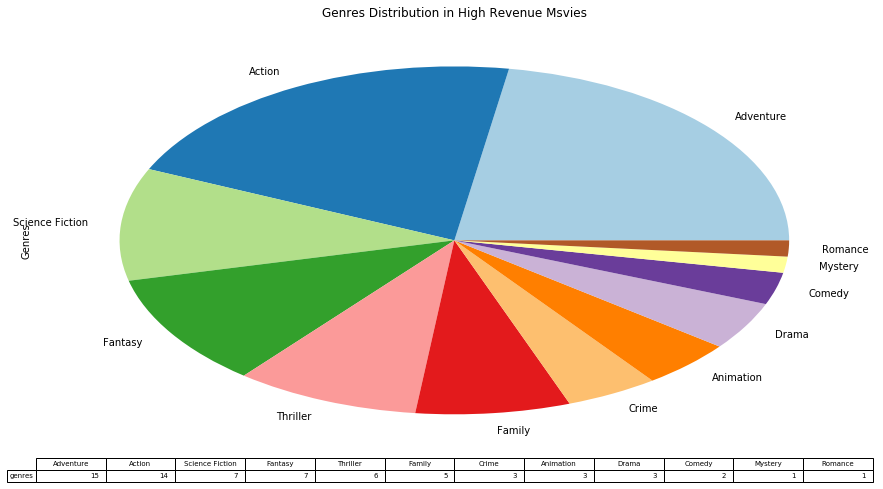

In [40]:
plot(df=revenue_genres, title='Genres Distribution in High Revenue Msvies', 
                        ylabel='Genres', type='pie',colormap='Paired', table=True);

>##### We notice that Adventure and Action are dominating the genres of High Revenue Movies.
With **15** out of the 20 highest revenue movies having the _Adventure_ genre and **14** having the _Action_ genre

<a id='3'></a>
### 3. What kinds of properties are associated with movies that have high revenues? 
>(Calculated for the `revenues_adj` column)

<ul>
    <li><a href="#3.1">Is there a relation between average vote and high revenues?</a></li>
    <li><a href="#3.2">Is there a relation between Popularity and High Revenues?</a></li>
    <li><a href="#3.3">What are the genres associated with high revenue movies?</a></li>
</ul>

In [41]:
# What are the 20 movies with highest revenues
revenues_adj_df = df.sort_values(by=['revenue_adj'], ascending=False)[:20]
revenues_adj_df.head(20)

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09
1329,11,12.037933,11000000,775398007,Star Wars,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]",Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,2.010733,8000000,441306145,The Exorcist,William Friedkin,Something almost beyond comprehension is happe...,exorcism|holy water|religion and supernatural|...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]",Warner Bros.|Hoya Productions,7.2,1973,3.928928e+07,2.167325e+09
9806,578,2.563191,7000000,470654000,Jaws,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]",Universal Pictures|Zanuck/Brown Productions,7.3,1975,2.836275e+07,1.907006e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
8889,601,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,He is afraid. He is alone. He is three million...,farewell|homesickness|nasa|extraterrestrial te...,A science fiction fairytale about an extra-ter...,115,"[Science Fiction, Adventure, Family, Fantasy]",Universal Pictures|Amblin Entertainment,7.2,1982,2.372625e+07,1.791694e+09
8094,1642,1.136610,22000000,1106279658,The Net,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,cheating|new identity|computer virus|chase|com...,Angela Bennett is a freelance software enginee...,114,"[Crime, Drama, Mystery, Thriller, Action]",Columbia Pictures,5.6,1995,3.148127e+07,1.583050e+09
10110,12230,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,puppy|animation|dog|dalmatian,When a litter of dalmatian puppies are abducte...,79,"[Adventure, Animation, Comedy, Family]",Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09


In [42]:
revenues_adj_df.reset_index(inplace=True, drop=True)
revenues_adj_df

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,19995,9.432768,237000000,2781505847,Avatar,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09
1,11,12.037933,11000000,775398007,Star Wars,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]",Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09
2,597,4.355219,200000000,1845034188,Titanic,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09
3,9552,2.010733,8000000,441306145,The Exorcist,William Friedkin,Something almost beyond comprehension is happe...,exorcism|holy water|religion and supernatural|...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]",Warner Bros.|Hoya Productions,7.2,1973,3.928928e+07,2.167325e+09
4,578,2.563191,7000000,470654000,Jaws,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]",Universal Pictures|Zanuck/Brown Productions,7.3,1975,2.836275e+07,1.907006e+09
5,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
6,601,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,He is afraid. He is alone. He is three million...,farewell|homesickness|nasa|extraterrestrial te...,A science fiction fairytale about an extra-ter...,115,"[Science Fiction, Adventure, Family, Fantasy]",Universal Pictures|Amblin Entertainment,7.2,1982,2.372625e+07,1.791694e+09
7,1642,1.136610,22000000,1106279658,The Net,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,cheating|new identity|computer virus|chase|com...,Angela Bennett is a freelance software enginee...,114,"[Crime, Drama, Mystery, Thriller, Action]",Columbia Pictures,5.6,1995,3.148127e+07,1.583050e+09
8,12230,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,puppy|animation|dog|dalmatian,When a litter of dalmatian puppies are abducte...,79,"[Adventure, Animation, Comedy, Family]",Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09
9,24428,7.637767,220000000,1519557910,The Avengers,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09


[Text(0,0,'Avatar'),
 Text(0,0,'Star Wars'),
 Text(0,0,'Titanic'),
 Text(0,0,'The Exorcist'),
 Text(0,0,'Jaws'),
 Text(0,0,'Star Wars: The Force Awakens'),
 Text(0,0,'E.T. the Extra-Terrestrial'),
 Text(0,0,'The Net'),
 Text(0,0,'One Hundred and One Dalmatians'),
 Text(0,0,'The Avengers'),
 Text(0,0,'The Empire Strikes Back'),
 Text(0,0,'Jurassic World'),
 Text(0,0,'Jurassic Park'),
 Text(0,0,'Furious 7'),
 Text(0,0,'The Jungle Book'),
 Text(0,0,'The Lord of the Rings: The Return of the King'),
 Text(0,0,'Avengers: Age of Ultron'),
 Text(0,0,'Harry Potter and the Deathly Hallows: Part 2'),
 Text(0,0,'The Godfather'),
 Text(0,0,'Return of the Jedi')]

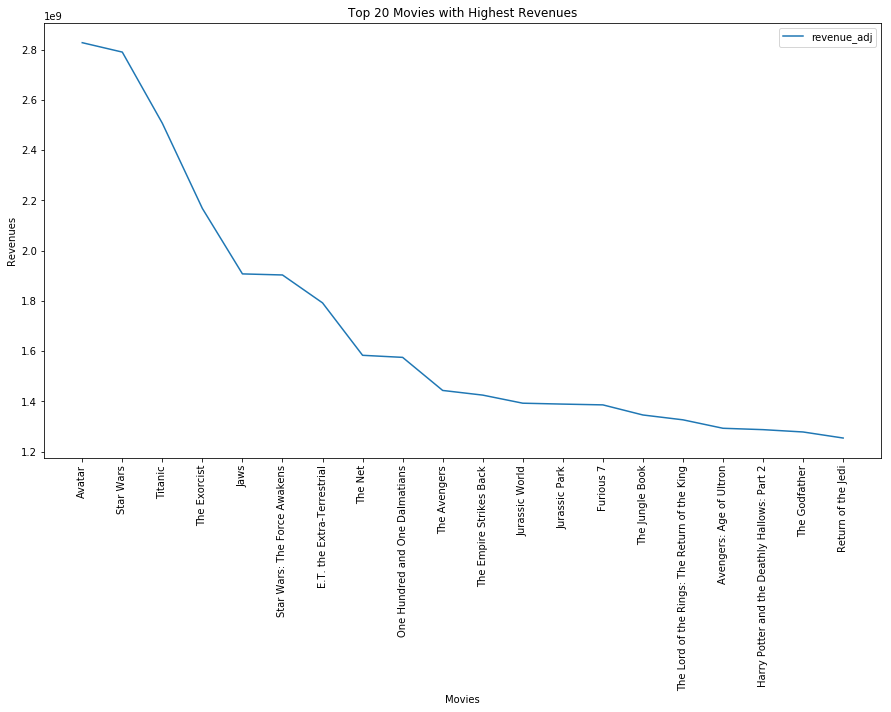

In [43]:
ax = plot(df=revenues_adj_df, type='line', y='revenue_adj', ylabel= "Revenues", xlabel="Movies", 
                 title="Top 20 Movies with Highest Revenues", rot = 90, figsize=(15,8), xticks=revenues_df.index)
ax.set_xticklabels(revenues_adj_df.original_title);

<a id='3.1'></a>
#### 3.1 Is there a relation between average vote and high revenues?

##### - Let's first see the distributions of different columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1406f668>,
      dtype=object)

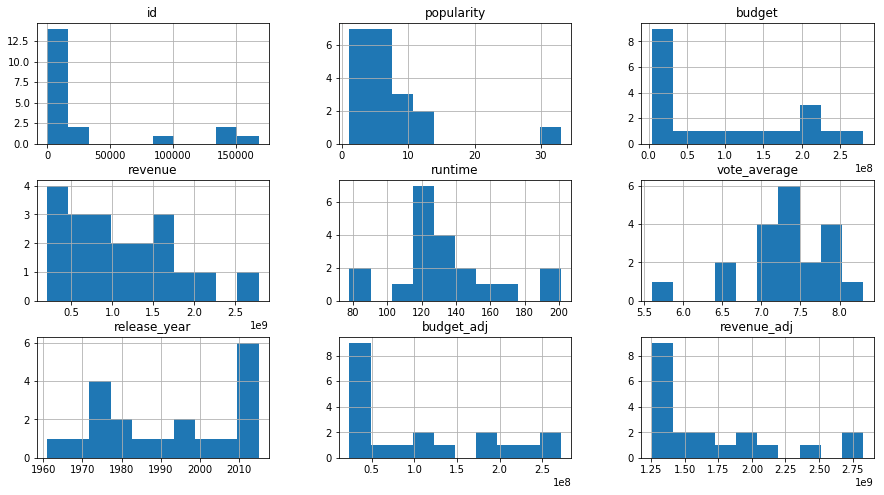

In [44]:
revenues_adj_df.hist(figsize=(15,8));

>#### - Notice that popularity and revenues columns are skewed to the left, meaning that most of the high revenue movies have popularity between 0 - 10, and that most of them have revenues that fall between 1.25 and 1.75 billion US Dollars
>#### - As for average votes, it's a bit skewed to the right and taht it starts after 5.5; Meaning that all of the high revenue movies have average ratings that are more than 5.5 with most of them falling in the range from 7.0 and 8.0

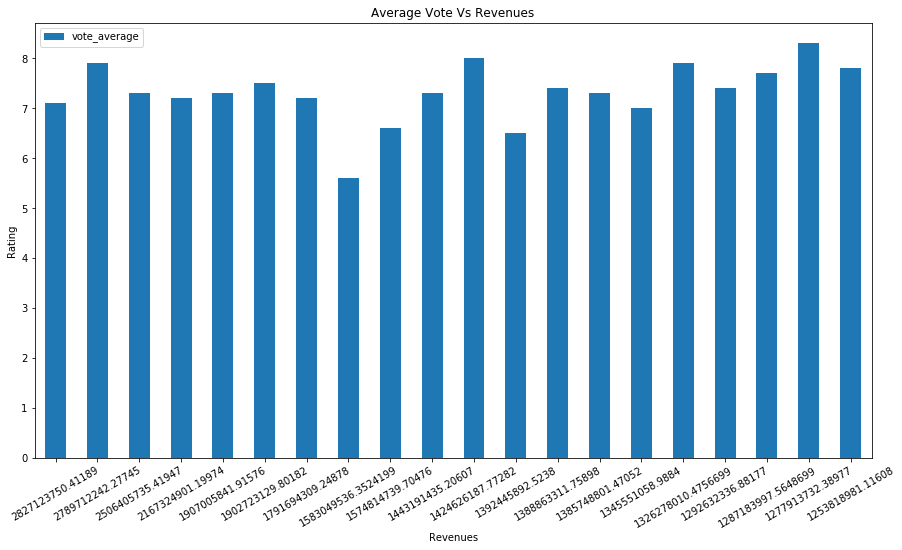

In [45]:
plot(df=revenues_adj_df, x='revenue_adj', y='vote_average', xlabel= "Revenues", ylabel="Rating", 
                 title="Average Vote Vs Revenues", rot = 30, type='bar', figsize=(15,8), width=0.5);

>#### We see that higher revenues are not in direct correlation with a vote average, but all 20 movies with high revenues are accociated with a rating > 5

##### Let's see what is the movie with the highest vote average among those high profit movies

In [46]:
revenues_adj_df.loc[revenues_adj_df['revenue_adj'] == revenues_adj_df.iloc[revenues_adj_df['vote_average'].argmax()].revenue_adj]

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
18,238,5.738034,6000000,245066411,The Godfather,Francis Ford Coppola,An offer you can't refuse.,italy|love at first sight|loss of father|patri...,"Spanning the years 1945 to 1955, a chronicle o...",175,"[Drama, Crime]",Paramount Pictures|Alfran Productions,8.3,1972,3.128737e+07,1.277914e+09


##### And what was the rank of this movie among the high revenues movies?

In [47]:
revenues_adj_df['vote_average'].argmax()+1

19

<a id='3.2'></a>
#### 3.2 Is there a relation between Popularity and High Revenues?

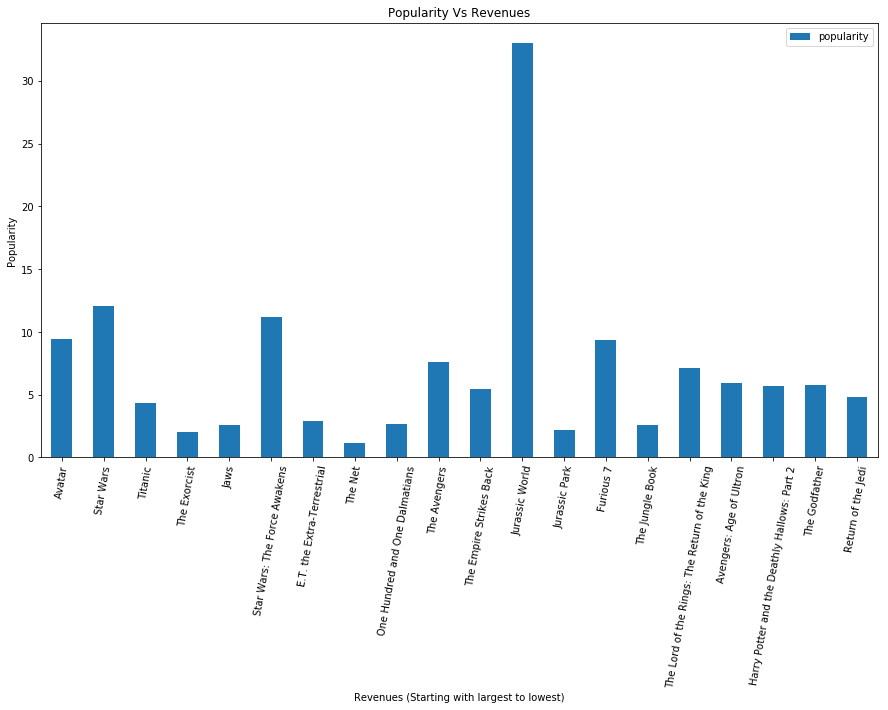

In [48]:
plot(df=revenues_adj_df, x='original_title', y='popularity', xlabel= "Revenues (Starting with largest to lowest)", ylabel="Popularity", 
                 title="Popularity Vs Revenues", rot = 80, type='bar', figsize=(15,8), width=0.5);

>#### We notice there is not a general trend with popularity as well, even if we disregarded Jurassic World popularity as an outlier

<a id='3.3'></a>
#### 3.3 What are the genres associated with high revenue movies?

In [49]:
# What are the unique genres that we have
set(itertools.chain.from_iterable(df.genres))

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [50]:
# Let's find out the count of each genre
revenue_adj_genres = pd.Series(revenues_adj_df['genres'].explode()).value_counts()
revenue_adj_genres

Adventure          15
Action             11
Science Fiction    10
Thriller            6
Fantasy             5
Family              4
Drama               4
Crime               3
Animation           2
Horror              2
Mystery             1
Romance             1
Comedy              1
Name: genres, dtype: int64

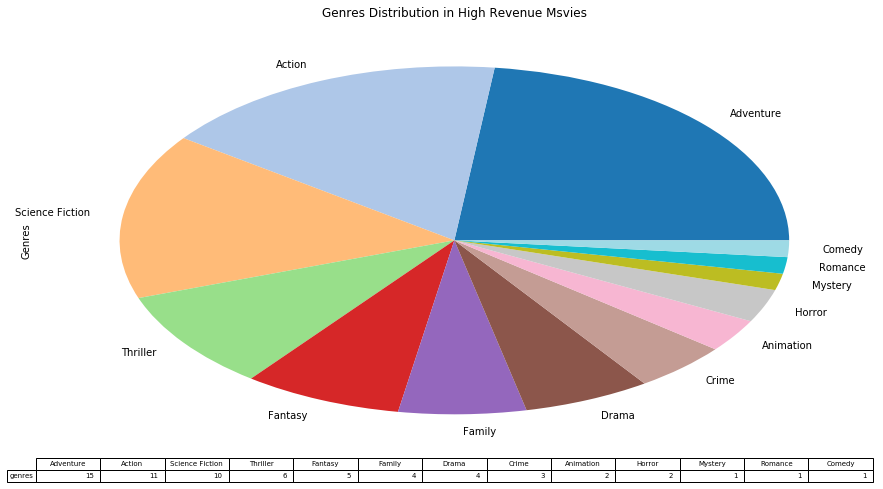

In [51]:
plot(df=revenue_adj_genres, type='pie', figsize=(15,8), title='Genres Distribution in High Revenue Msvies', 
                        ylabel='Genres', colormap='tab20', table=True);

>##### We notice that Adventure and Action are still dominating the genres of High Revenue Movies with a noticable increase in Science Fiction share
With each having **15**, **11**, and **10** resepectively out of the 20 highest revenue movies.

<a id='4'></a>
### 4. What is the film with the highest budget each year?
>(Calculated for the `budget_adj` column)

In [52]:
# Let's get the dataframe of the highest budget movie for each year
budgets = df.groupby(['release_year'])['budget_adj'].nlargest(1)
budgets

release_year       
1960          10143    8.847561e+07
1961          10112    4.376917e+07
1962          9850     1.081267e+08
1963          10443    2.215444e+08
1964          9887     1.195145e+08
1965          10716    1.384113e+08
1966          10824    1.209243e+08
1967          10409    1.634191e+08
1968          9719     7.522756e+07
1969          10730    7.133117e+07
1970          10656    1.431331e+08
1971          9931     1.077039e+08
1972          7269     3.128737e+07
1973          10593    7.366739e+07
1974          9785     6.191197e+07
1975          9836     6.077732e+07
1976          10218    1.341094e+08
1977          1335     7.915118e+07
1978          10758    1.838485e+08
1979          7828     1.051594e+08
1980          7315     1.428860e+08
1981          8426     8.393668e+07
1982          8920     1.129821e+08
1983          7993     8.888607e+07
1984          7927     1.217444e+08
1985          6109     1.013583e+08
1986          10483    7.957626e+07
1987    

In [53]:
highest_budgets = df.loc[list(list(zip(*budgets.index))[1])].reset_index()
highest_budgets

,index,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,10143,967,1.136943,12000000,60000000,Spartacus,Stanley Kubrick,More titanic than any story ever told!,gladiator|roman empire|gladiator fight|slavery...,Spartacus is a 1960 American historical drama ...,197,"[Action, Drama, History]",Bryna Productions,6.9,1960,8.847561e+07,4.423780e+08
1,10112,1725,0.900245,6000000,43656822,West Side Story,Jerome Robbins|Robert Wise,The screen achieves one of the great entertain...,slum|street gang|love at first sight|showdown|...,In the slums of the upper West Side of Manhatt...,152,"[Music, Crime, Drama]",United Artists|20th Century Fox Home Entertain...,6.6,1961,4.376917e+07,3.184705e+08
2,9850,947,1.168767,15000000,70000000,Lawrence of Arabia,David Lean,A Mighty Motion Picture Of Action And Adventure!,cairo|arabian|world war i|horse|jerusalem,An epic about British officer T.E. Lawrence's ...,216,"[Adventure, Drama, History, War]",Horizon Pictures (II),7.5,1962,1.081267e+08,5.045914e+08
3,10443,8095,0.804533,31115000,57750000,Cleopatra,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,ancient rome|historical figure|cleopatra|juliu...,Historical epic. The triumphs and tragedy of t...,248,"[Drama, History, Romance]",Twentieth Century Fox Film Corporation|MCL Fil...,6.3,1963,2.215444e+08,4.111904e+08
4,9887,11113,0.633882,17000000,72000000,My Fair Lady,George Cukor,The loverliest motion picture of them all!,musical|transformation|flower girl|colonel|wager,A misogynistic and snobbish phonetics professo...,170,"[Drama, Family, Music, Romance]",Warner Bros.,7.1,1964,1.195145e+08,5.061793e+08
5,10716,2428,0.146033,20000000,12000000,The Greatest Story Ever Told,George Stevens,no tagline,jesus christ|biography|epic,All-star epic retelling of Christ's life.,199,"[Drama, History]",George Stevens Productions,5.7,1965,1.384113e+08,8.304676e+07
6,10824,2525,0.533292,18000000,0,The Bible: In the Beginning...,John Huston,The unforgettable adventure of Man from the Cr...,bible|christian|flood|noah|noah's ark,Extravagant production of the first part of th...,174,[Drama],Seven Arts Productions|Dino de Laurentiis Cine...,5.8,1966,1.209243e+08,0.000000e+00
7,10409,1654,0.485288,25000000,45300000,The Dirty Dozen,Robert Aldrich,Train them! Excite them! Arm them!...Then turn...,based on novel|world war ii|nazis|castle|secre...,Classic World War II action drama about a grou...,150,"[Action, Adventure, War]",Metro-Goldwyn-Mayer (MGM)|Seven Arts Pictures|MKH,7.2,1967,1.634191e+08,2.961154e+08
8,9719,62,3.309196,12000000,56715371,2001: A Space Odyssey,Stanley Kubrick,An epic drama of adventure and exploration,moon|jupiter|artificial intelligence|man vs ma...,Humanity finds a mysterious object buried bene...,149,"[Science Fiction, Mystery, Adventure]",Stanley Kubrick Productions|Metro-Goldwyn-Maye...,7.7,1968,7.522756e+07,3.555466e+08
9,10730,11463,0.575000,12000000,0,Battle of Britain,Guy Hamilton,no tagline,world war ii|nazis|winston churchill|aviation|...,"In 1940, the Royal Air Force fights a desperat...",151,"[Action, Drama, History, War]",Spitfire Productions,6.1,1969,7.133117e+07,0.000000e+00


[Text(0,0,'1960 - Spartacus'),
 Text(0,0,'1961 - West Side Story'),
 Text(0,0,'1962 - Lawrence of Arabia'),
 Text(0,0,'1963 - Cleopatra'),
 Text(0,0,'1964 - My Fair Lady'),
 Text(0,0,'1965 - The Greatest Story Ever Told'),
 Text(0,0,'1966 - The Bible: In the Beginning...'),
 Text(0,0,'1967 - The Dirty Dozen'),
 Text(0,0,'1968 - 2001: A Space Odyssey'),
 Text(0,0,'1969 - Battle of Britain'),
 Text(0,0,'1970 - Tora! Tora! Tora!'),
 Text(0,0,'1971 - Bedknobs and Broomsticks'),
 Text(0,0,'1972 - The Godfather'),
 Text(0,0,'1973 - Robin Hood'),
 Text(0,0,'1974 - The Towering Inferno'),
 Text(0,0,'1975 - The Hindenburg'),
 Text(0,0,'1976 - The Bad News Bears'),
 Text(0,0,'1977 - A Bridge Too Far'),
 Text(0,0,'1978 - Superman'),
 Text(0,0,'1979 - Star Trek: The Motion Picture'),
 Text(0,0,'1980 - Superman II'),
 Text(0,0,'1981 - Lion of the Desert'),
 Text(0,0,'1982 - Annie'),
 Text(0,0,'1983 - Trading Places'),
 Text(0,0,'1984 - The Cotton Club'),
 Text(0,0,'1985 - Santa Claus: The Movie'),


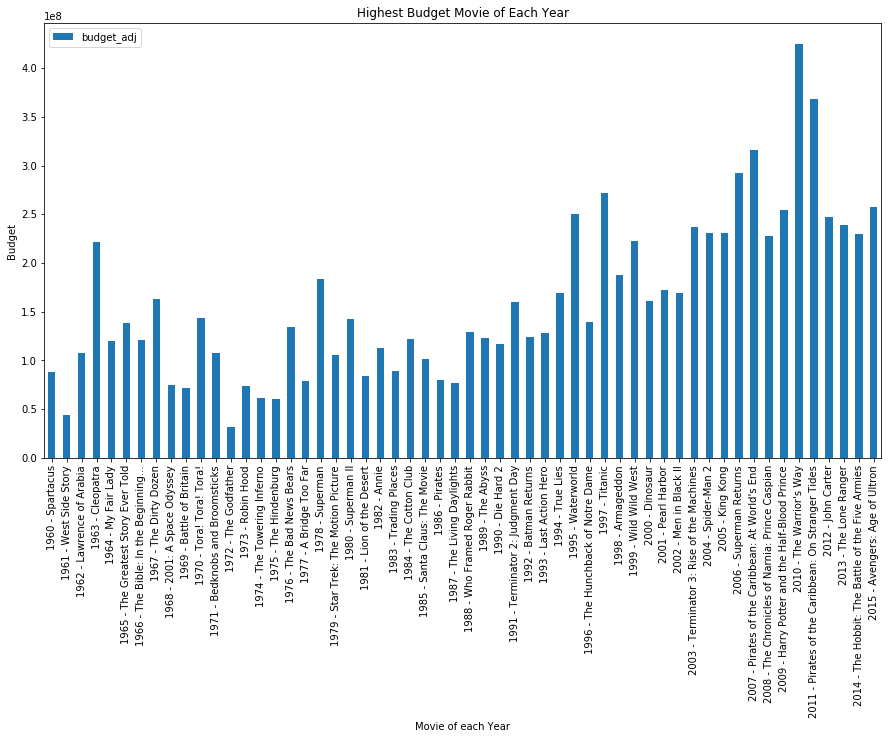

In [54]:
ax = plot(df=highest_budgets, x='release_year', y='budget_adj', figsize=(15,8), ylabel='Budget',
                              xlabel='Movie of each Year', title="Highest Budget Movie of Each Year", width=0.5)
ax.set_xticklabels(list(highest_budgets['release_year'].astype(str)+ ' - ' + highest_budgets['original_title']));

>##### We notice there is a general trend of increasing highest budget films across the years with some outliers. 
With the two  highest budget movies being `The Warior's Way` and `Pirates of the Caribbean: On Stranger Tides`

<a id='conclusions'></a>
## Conclusions
> - Drama genre has been popular accross the years. It's the most popular genre followed by Action and Comedy
> - Number of produced movies increased steadily accross the years
> - There is no direct correlation between revenues and average rating In general, High Revenue Movies have an average ratingh that is more than 5
> - Avatar is the highest revenue movie in both `revenue` and `revenue_adj`
> - There is not a direct correlation between popularity and revenues
> - Adventure, Action, and Science Fiction are the most represented genres in high revenue movie
> - _The Lord of the Rings: The Return of the King_ and _The Godfather_ are the high revenue movies with the highest average rating for both `revenue` and `revenue_adj`, respectively
> - The movie with the highest budget is `The Warior's Way`


### Limitations
> - As I needed to split explode the genres column and this could increase the dataset size by several folds, I prefered to do genres analysis on a given subset of the movies dataset, namely, the top 20 movies with highest budgets to save time.
- Many movies had 0 for revenue, budget, budget_adj, revenue_adj, and runtime columns, which may have affected the accuracy of the analysis done in this notebook.
- The data provided and its size provide good measure for answering the questions raiesd, but having a larger dataset with less missing values would have been better for the analysis
- I would have liked to rotate the labels on the x axis of the last figure a little bit, but with the labels being this long, they just overlab and become an entangled mess if rotated


<a href="#home">Home</a>

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0